# Chargement des données

La librairie sklearn met des jeux de données et des générateurs de jeux de données à disposition pour illustrer et tester l'apprentissage de modèles.  Je reprends un exemple de sklearn sur https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
# Code source: Jaques Grobler 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
diabetes_X.shape, diabetes_y.shape

((442, 10), (442,))

In [5]:
# On regarde les premières lignes
diabetes_X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [6]:
# Use only one feature
diabetes_X = diabetes_X[:,2].reshape(-1, 1) # autre façon : diabetes_X[:, np.newaxis, 2]

In [7]:
diabetes_X.shape

(442, 1)

In [8]:
# On regarde les premières lignes
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [9]:
diabetes_y[:5]

array([151.,  75., 141., 206., 135.])

# Préparation

In [10]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Apprentissage

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [13]:
# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125] 152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


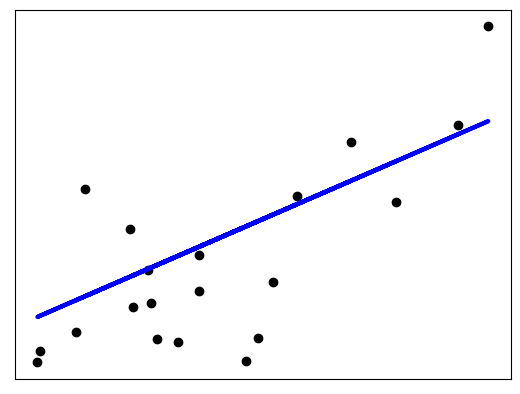

In [14]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Refaire à la main ! 

On résout (en remplaçant diabete_X et diabete_y par $X$ et $y$)

$$\mathop{\mathrm{argmin}}_{a,b} \sum_{x,y\in X\times y}  (ax + b - y)^2$$

$$\mathop{\mathrm{argmin}}_{a,b} \Vert aX + b\mathbf 1 -y \Vert^2$$
sous forme matricielle, si $Z$ est la matrice $X$ avec une colonne supplémentaire de 1 et si $w$ est le vecteur $(b,a)$

$$\mathop{\mathrm{argmin}}_{w} \Vert Zw -y \Vert^2$$

La forme générale c'est 
$$\mathop{\mathrm{argmin}}_{w} \textrm{Loss}(X,y,w)$$

avec ici Loss qui la fonction de perte, ou encore d'un point de vue optimisation, la fonction à optimiser, la fonction d'objectif. Dans la régression linéaire, on a la fonction de perte qui est l'erreur quadratique.

On peut dériver l'expression matricielle ou l'expression scalaire de la fonction de perte. La dérivée par rapport à $a$  de $f(a,b) = \sum_{x,y\in X\times y}  (ax + b - y)^2$ est
$$\frac{\partial f}{\partial a} = \sum_{x,y\in X\times y}  2x(ax + b - y)$$ et la dérivée par rapport à $b$ est $$\frac{\partial f}{\partial b} = \sum_{x,y\in X\times y}  2(ax + b - y)$$

pour $a$, c'est deux fois x fois l'erreur et pour $b$ c'est deux fois l'erreur. Sous forme matricielle, c'est $Z^\top(Zw-y)$

On peut ajouter une colonne de 1 à notre X

In [15]:
Z = np.concatenate([diabetes_X_train,np.ones((diabetes_X_train.shape[0],1))],axis=1)
y = diabetes_y_train # pour suivre les notations ci-dessus

In [16]:
Z.shape

(422, 2)

In [17]:
# On regarde les premières lignes
Z[:5]

array([[ 0.06169621,  1.        ],
       [-0.05147406,  1.        ],
       [ 0.04445121,  1.        ],
       [-0.01159501,  1.        ],
       [-0.03638469,  1.        ]])

# Gradient Descent

## De t=0 to t=1

In [18]:
rng = np.random.RandomState(0)

In [19]:
w = rng.rand(2)  # 2 est le nombre de colonnes de la matrice des données
w

array([0.5488135 , 0.71518937])

On calcule la valeur de la fonction d'objectif $f$ à ce point de coordonnées $w = (b,a)$.

In [21]:
E = w@Z.T-y  # ici w est en ligne comme y... on transpose tout. 
print(E.shape)
print(E[0], w[1]+w[0]*Z[0,0]-y[0])  # pour vérifier sur un exemple
obj = E.T@E # ou np.linalg.norm(E)**2
print(obj)


(422,)
-150.25095092234903 -150.25095092234903
12342394.823849142


In [22]:
# Z 2x * (ax+by)
# Z 2  * (ax+b) 
Grad = 2* Z.T@E.reshape(-1,1)
print(Grad)

[[  -1853.19476001]
 [-128834.16112583]]


On fixe un pas d'apprentissage de 0.00005, and calcule la nouvelle valeur de $w$. On va dans la direction opposée du gradient.

In [25]:
eta = 0.00005
w_suivant = w - eta * Grad.ravel()
print(w_suivant, w)

[0.64147324 7.15689742] [0.5488135  0.71518937]


**Question** Recalculer la valeur de la fonction d'objectif. Vérifier qu'on a bien baissé!

In [30]:
E = w_suivant@Z.T-y
obj = E.T@E
print(obj)


11529822.444433177


## Tout rassembler !

**Question** Écrire l'algorithme qui fait cette descente de gradient dont on rappelle le pseudo code

```
Initialiser w aléatoirement
t = 0
While t < n_iter: 
  Calculer la fonction de loss
  Calculer le gradient
  Mettre à jour les paramètres en allant dans le sens opposé du gradient
  t = t + 1
```

In [52]:
def regr(X, y, eta=0.00005, n_iter=100, verbose=True):
    """avec verbose=True on peut afficher la valeur de la fonction objectif """
    rng = np.random.RandomState(0)
    w = rng.rand(2) 
    t = 0
    while t < n_iter:
        E = w@X.T-y
        obj = E.T@E
        Grad = 2* Z.T@E.reshape(-1,1)
        w = w - eta * Grad.ravel()
        t += 1
        if verbose:
            print(obj)

In [53]:
regr(Z, y, eta=0.0005, n_iter=10000)

12342394.823849142
5792696.199418331
3603481.606526863
2871036.5201767157
2625276.6906179585
2542112.593549397
2513271.1358971545
2502580.0176062486
2497954.6520800716
2495357.7697585365
2493440.58007379
2491752.4699870055
2490142.893110075
2488561.550496343
2486991.634261725
2485427.5253539127
2483867.342736326
2482310.4541904912
2480756.6447151853
2479205.8387019914
2477658.007118602
2476113.1365002454
2474571.2185902055
2473032.2468788764
2471496.2154474985
2469963.118581857
2468432.95064321
2466905.7060251604
2465381.3791392213
2463859.964409995
2462341.456273536
2460825.8491767985
2459313.137577435
2457803.3159437166
2456296.378754493
2454792.320499163
2453291.1356776566
2451792.8188004117
2450297.364388352
2448804.7669728706
2447315.021095808
2445828.1213094317
2444344.0621764157
2442862.8382698246
2441384.444173088
2439908.8744799844
2438436.1237946223
2436966.1867314177
2435499.057915075
2434034.7319805683
2432573.2035731217
2431114.467348188
2429658.5179714332
2428205.35011871

avec un pas de gradient trop grand ou trop petit cela marche moins bien ! 

In [46]:
regr(Z, y, eta=0.1, n_iter=10000)

12342394.823849142
68397737953.50338
475729355716617.06
3.308965564513698e+18
2.3015718963405927e+22
1.6008728681969214e+26
1.1134972338703711e+30
7.745000333683288e+33
5.387083896046526e+37
3.747020226304167e+41
2.6062635829073162e+45
1.812803095084626e+49
1.2609066416385049e+53
8.770315779132489e+56
6.100248529561827e+60
4.2430663911741336e+64
2.9512916256880204e+68
2.052789529283323e+72
1.4278307215922384e+76
9.931366759427911e+79
6.90782487158427e+83
4.804781216158301e+87
3.341995919745001e+91
2.3245463685279836e+95
1.6168529074233352e+99
1.1246122510770729e+103
7.822311537839203e+106
5.4408581923601065e+110
3.7844232777194495e+114
2.632279511540135e+118
1.830898638550134e+122
1.2734931111792848e+126
8.857861762928429e+129
6.161141691492318e+133
4.285421014528821e+137
2.9807516514552027e+141
2.0732806362620153e+145
1.4420834404639196e+149
1.0030502445677803e+153
6.976779324251977e+156
4.8527429211967733e+160
3.3753559865891597e+164
2.3477501737086767e+168
1.6329924606616103e+172
1.

/tmp/ipykernel_270098/4167599608.py:8: RuntimeWarning: overflow encountered in matmul
  obj = E.T@E
/tmp/ipykernel_270098/4167599608.py:9: RuntimeWarning: overflow encountered in matmul
  Grad = 2* Z.T@E.reshape(-1,1)
/tmp/ipykernel_270098/4167599608.py:9: RuntimeWarning: invalid value encountered in matmul
  Grad = 2* Z.T@E.reshape(-1,1)
/tmp/ipykernel_270098/4167599608.py:10: RuntimeWarning: invalid value encountered in subtract
  w = w - eta * Grad.ravel()


In [47]:
regr(Z, y, eta=0.0001, n_iter=10000)

12342394.823849142
10752272.846566737
9419184.70438406
8301574.041370837
7364603.195026287
6579066.94026752
5920481.855677668
5368322.917990864
4905383.521442266
4517238.967061429
4191796.693232617
3918919.2234824924
3690108.074815645
3498238.770699331
3337338.696267652
3202400.869157609
3089227.8192571155
2994300.70945619
2914669.616519871
2847861.550984754
2791803.348092783
2744757.025462449
2705265.591916757
2672107.617759683
2644259.1499792496
2620861.7848739447
2601195.902590709
2584658.22901383
2570743.0253730267
2559026.3190531363
2549152.683914062
2540824.1579246293
2533790.9525565454
2527843.6642526537
2522806.745119091
2518533.0292542395
2514899.1440425976
2511801.663335407
2509153.882572244
2506883.115290219
2504928.4267245913
2503238.7338332944
2501771.2125031687
2500489.9622738156
2499364.8869444355
2498370.7561604404
2497486.4187196298
2496694.1430683937
2495979.064424302
2495328.72128608
2494732.666879102
2494182.1434210953
2493669.809051468
2493189.50890981
2492736.0832

**Question** Une heuristique est de contrôler si l'objectif remonte ou pas et ajuster le pas de grandient dynamiquement en l'augmentant graduellement (par exemple de 10%) ou le baissant (on le divise par 10) si l'objectif remonte. 

In [71]:
def regr_tuned(X, y, eta=0.0001, n_iter=100, verbose=True):
    """On règle eta en contrôlant la valeur de l'objectif"""
    rng = np.random.RandomState(0)
    w = rng.rand(2) 
    t = 0
    obj_old = w@X.T-y
    while t < n_iter:
        E = w@X.T-y
        obj = E.T@E
        Grad = 2* Z.T@E.reshape(-1,1)
        if obj > obj_old : 
            eta = eta//10
        else :
            eta += eta//10
        w = w - eta * Grad.ravel()
        t += 1
        obj_old = obj
        if verbose:
            print(obj)
    

In [72]:
regr_tuned(Z, y, eta=0.1, n_iter=10000)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()